In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-dataset/Mental Health Dataset.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv(r"/kaggle/input/mental-health-dataset/Mental Health Dataset.csv")

In [7]:
data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,2015-07-27 23:25:34,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,2015-08-17 09:38:35,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,2015-08-25 19:59:38,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,2015-09-26 01:07:35,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [8]:
data.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [11]:
data.duplicated().any()

True

In [12]:
data = data.drop_duplicates()

In [13]:
data.duplicated().any()

False

In [14]:
data.shape

(286808, 17)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [17]:
data_1 = pd.get_dummies(data["Days_Indoors"])

In [18]:
data_1

,1-14 days,15-30 days,31-60 days,Go out Every day,More than 2 months
3,True,False,False,False,False
4,True,False,False,False,False
5,True,False,False,False,False
6,True,False,False,False,False
7,True,False,False,False,False
...,...,...,...,...,...
292359,False,True,False,False,False
292360,False,True,False,False,False
292361,False,True,False,False,False
292362,False,True,False,False,False


In [19]:
data = data.drop(["Days_Indoors"] , axis = 1)

In [20]:
data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,Yes,No,Yes,Medium,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,2015-07-27 23:25:34,Male,United States,Business,Yes,Yes,Yes,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,2015-08-17 09:38:35,Male,South Africa,Business,No,Yes,Yes,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,2015-08-25 19:59:38,Male,United States,Business,No,Yes,No,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,2015-09-26 01:07:35,Male,United States,Business,No,Yes,Yes,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [21]:
data = pd.concat([data , data_1] , axis = 1)

In [22]:
data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,...,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,1-14 days,15-30 days,31-60 days,Go out Every day,More than 2 months
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,Yes,No,Yes,...,No,No,Yes,Maybe,Yes,True,False,False,False,False
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,Yes,No,Yes,...,No,No,Yes,No,Yes,True,False,False,False,False
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,Yes,No,Yes,...,No,No,Yes,Maybe,Not sure,True,False,False,False,False
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,Yes,No,Yes,...,No,No,Yes,No,Not sure,True,False,False,False,False
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,Yes,No,Yes,...,No,No,Yes,No,No,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,2015-07-27 23:25:34,Male,United States,Business,Yes,Yes,Yes,No,Maybe,No,...,Yes,No,Maybe,Maybe,Not sure,False,True,False,False,False
292360,2015-08-17 09:38:35,Male,South Africa,Business,No,Yes,Yes,No,Maybe,No,...,Yes,No,Maybe,No,Yes,False,True,False,False,False
292361,2015-08-25 19:59:38,Male,United States,Business,No,Yes,No,No,Maybe,No,...,Yes,No,Maybe,No,No,False,True,False,False,False
292362,2015-09-26 01:07:35,Male,United States,Business,No,Yes,Yes,No,Maybe,No,...,Yes,No,Maybe,No,Yes,False,True,False,False,False


In [23]:
data.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
1-14 days                  0
15-30 days                 0
31-60 days                 0
Go out Every day           0
More than 2 months         0
dtype: int64

In [24]:
data = data.drop(["Timestamp"] , axis = 1)

In [25]:
data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,1-14 days,15-30 days,31-60 days,Go out Every day,More than 2 months
3,Female,United States,Corporate,No,Yes,Yes,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,True,False,False,False,False
4,Female,United States,Corporate,No,Yes,Yes,Yes,No,Yes,Medium,No,No,Yes,No,Yes,True,False,False,False,False
5,Female,Poland,Corporate,No,No,Yes,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,True,False,False,False,False
6,Female,Australia,Corporate,No,Yes,Yes,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,True,False,False,False,False
7,Female,United States,Corporate,No,No,No,Yes,No,Yes,Medium,No,No,Yes,No,No,True,False,False,False,False


In [26]:
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [27]:
data

,Gender,Country,Occupation,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,1-14 days,15-30 days,31-60 days,Go out Every day,More than 2 months
3,0,34,1,0,1,1,2,1,2,2,0,1,2,0,2,1,0,0,0,0
4,0,34,1,0,1,1,2,1,2,2,0,1,2,1,2,1,0,0,0,0
5,0,25,1,0,0,1,2,1,2,2,0,1,2,0,1,1,0,0,0,0
6,0,0,1,0,1,1,2,1,2,2,0,1,2,1,1,1,0,0,0,0
7,0,34,1,0,0,0,2,1,2,2,0,1,2,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,34,0,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,0
292360,1,29,0,0,1,1,1,0,1,1,1,1,0,1,2,0,1,0,0,0
292361,1,34,0,0,1,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0
292362,1,34,0,0,1,1,1,0,1,1,1,1,0,1,2,0,1,0,0,0


<Axes: xlabel='Mood_Swings', ylabel='count'>

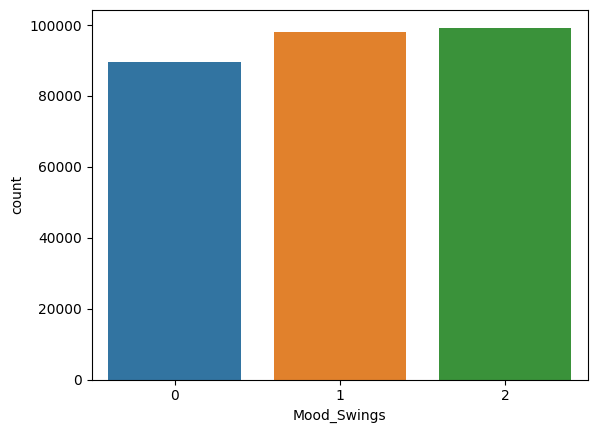

In [29]:
sn.countplot(x = "Mood_Swings" , data = data)

<Axes: xlabel='treatment', ylabel='count'>

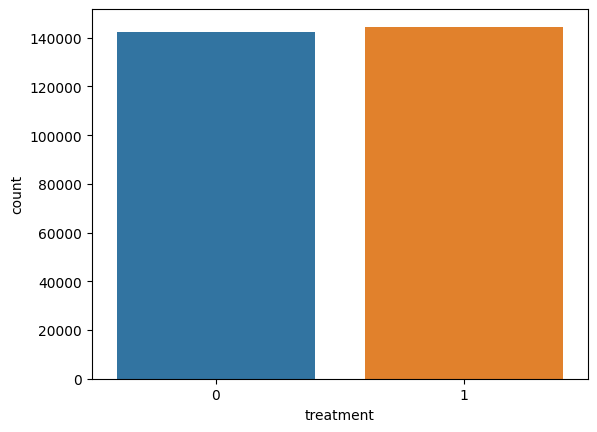

In [30]:
sn.countplot(x = "treatment" , data = data)

<Axes: xlabel='mental_health_interview', ylabel='count'>

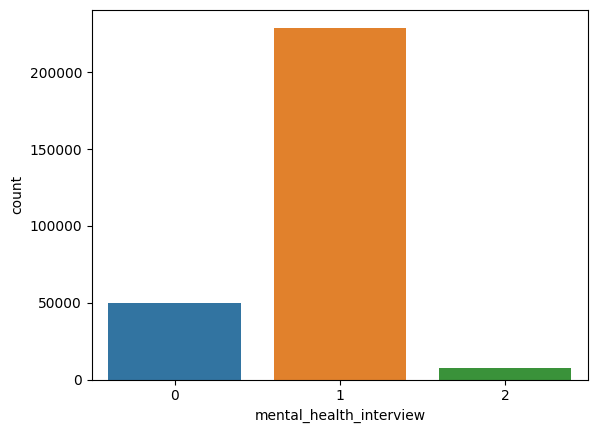

In [31]:
sn.countplot(x = "mental_health_interview" , data = data)

In [32]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier , VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [33]:
x = data.drop(["treatment"] , axis = 1)
y = data["treatment"]

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [35]:
data.shape

(286808, 20)

In [36]:
x_train.shape

(229446, 19)

In [37]:
x_test.shape

(57362, 19)

In [38]:
model = Sequential()
model.add(Dense(32 , input_dim = 19 ,kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(64 , activation = "relu"))
model.add(Dense(64 , activation = "relu"))
model.add(Dropout(0.10))
model.add(Dense(128 , activation = "relu"))
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.10))
model.add(Dense(512 , activation = "relu"))
model.add(Dense(512 , activation = "relu"))
model.add(Dense(850 , activation = "relu"))
model.add(Dense(1050 , activation = "relu"))
model.add(Dense(1050  , activation = "relu"))
model.add(Dense(1500  , activation = "relu"))
model.add(Dense(1500 , activation = "relu"))
model.add(Dropout(0.10))
model.add(Dense(2250 , activation = "relu"))
model.add(Dense(2250 , activation = "relu"))
model.add(Dense(1800 , activation = "relu"))
model.add(Dense(1250 , activation = "relu"))
model.add(Dense(850 , activation = "relu"))
model.add(Dense(500 , activation = "relu"))
model.add(Dense(350 , activation = "relu"))
model.add(Dense(128 , activation = "relu"))
model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.10))
model.add(Dense(64 , activation = "relu"))
model.add(Dense(64 , activation = "relu"))
model.add(Dense(64 , activation = "relu"))
model.add(Dense(32 , activation = "relu"))
model.add(Dense(32 , activation = "relu"))
model.add(Dense(32 , activation = "relu"))
model.add(Dropout(0.10))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [41]:
history = model.fit(x_train , y_train , epochs = 5 , validation_split = 0.10 , batch_size = 10)

Epoch 1/5
   21/20651 ━━━━━━━━━━━━━━━━━━━━ 2:42 8ms/step - accuracy: 0.4407 - loss: 0.6932 

I0000 00:00:1709918533.851985    5631 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709918533.873249    5631 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20651/20651 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5027 - loss: 0.6932

W0000 00:00:1709918705.679240    5632 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20651/20651 ━━━━━━━━━━━━━━━━━━━━ 199s 9ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.4979 - val_loss: 0.6932
Epoch 2/5
20651/20651 ━━━━━━━━━━━━━━━━━━━━ 167s 8ms/step - accuracy: 0.5036 - loss: 0.6932 - val_accuracy: 0.5021 - val_loss: 0.6931
Epoch 3/5
20651/20651 ━━━━━━━━━━━━━━━━━━━━ 165s 8ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5021 - val_loss: 0.6932
Epoch 4/5
20651/20651 ━━━━━━━━━━━━━━━━━━━━ 163s 8ms/step - accuracy: 0.5044 - loss: 0.6932 - val_accuracy: 0.5021 - val_loss: 0.6931
Epoch 5/5
20651/20651 ━━━━━━━━━━━━━━━━━━━━ 163s 8ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.5021 - val_loss: 0.6931


In [43]:
from matplotlib import pyplot

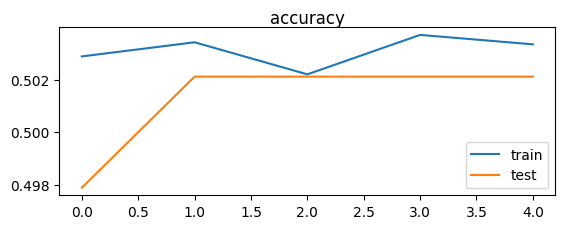

In [44]:
pyplot.subplot(211)
pyplot.plot(history.history["accuracy"] , label = "train")
pyplot.plot(history.history["val_accuracy"] , label = "test")
pyplot.title("accuracy" ,pad = -40)
pyplot.legend()
pyplot.show()

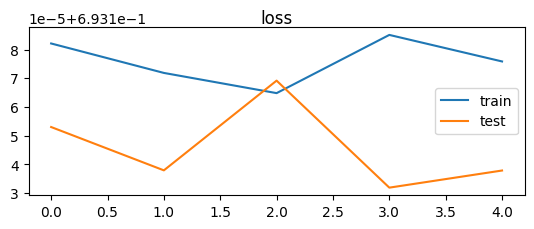

In [46]:
pyplot.subplot(211)
pyplot.title("loss" , pad = -40)
pyplot.plot(history.history["loss"] , label = "train")
pyplot.plot(history.history["val_loss"] , label = "test")
pyplot.legend()
pyplot.show()